In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv(r"C:\Users\hp_625\Desktop\realKnownCause\realKnownCause\ambient_temperature_system_failure.csv")

In [3]:
df1.isnull().sum()

timestamp    0
value        0
dtype: int64

<AxesSubplot:xlabel='timestamp'>

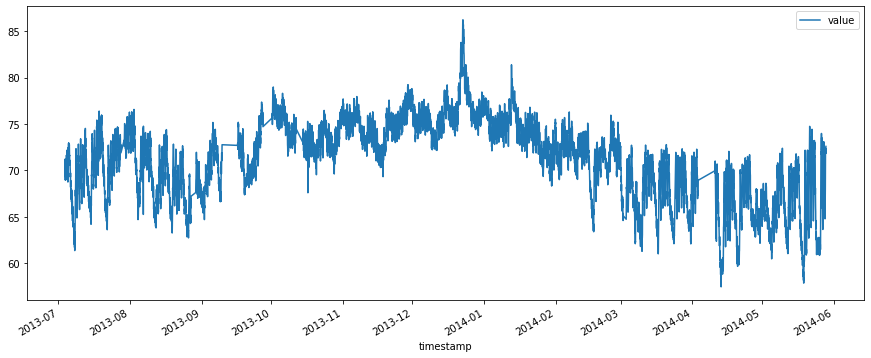

In [4]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1.plot(x='timestamp', figsize=(15, 6))

In [5]:
df = pd.read_csv(r"C:\Users\hp_625\Desktop\realKnownCause\realKnownCause\ambient_temperature_system_failure.csv")

In [6]:
df2=df["timestamp"].str.split(' ',expand=True)
df2.columns=['date','hour']
final_df = pd.concat([df,df2],axis=1)

final_df['date'] = pd.to_datetime(final_df['date'])
final_df['dayofweek'] = final_df['date'].apply(lambda time: time.dayofweek)
final_df['isweekend'] = final_df['dayofweek'] >= 5

mask = (pd.to_timedelta(final_df['hour']).between(pd.Timedelta('6h'),pd.Timedelta('18h')))
final_df['daylight'] = np.where(mask, 1, 0)

final_df['year'] = pd.to_datetime(final_df['timestamp']).dt.year
final_df['hour'] = pd.to_datetime(final_df['timestamp']).dt.hour
final_df['month'] = pd.to_datetime(final_df['timestamp']).dt.month

del final_df['date']
final_df

,timestamp,value,hour,dayofweek,isweekend,daylight,year,month
0,2013-07-04 00:00:00,69.880835,0,3,False,0,2013,7
1,2013-07-04 01:00:00,71.220227,1,3,False,0,2013,7
2,2013-07-04 02:00:00,70.877805,2,3,False,0,2013,7
3,2013-07-04 03:00:00,68.959400,3,3,False,0,2013,7
4,2013-07-04 04:00:00,69.283551,4,3,False,0,2013,7
...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,2,False,1,2014,5
7263,2014-05-28 12:00:00,72.172956,12,2,False,1,2014,5
7264,2014-05-28 13:00:00,72.046565,13,2,False,1,2014,5
7265,2014-05-28 14:00:00,71.825226,14,2,False,1,2014,5


<AxesSubplot:title={'center':'Value Distribution'}, ylabel='Frequency'>

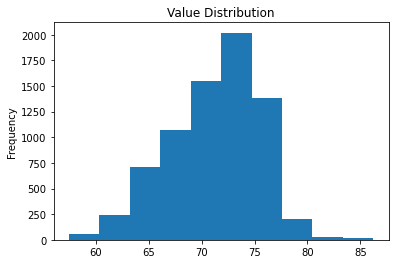

In [7]:
final_df['value'].plot(
    kind='hist',
    title='Value Distribution')

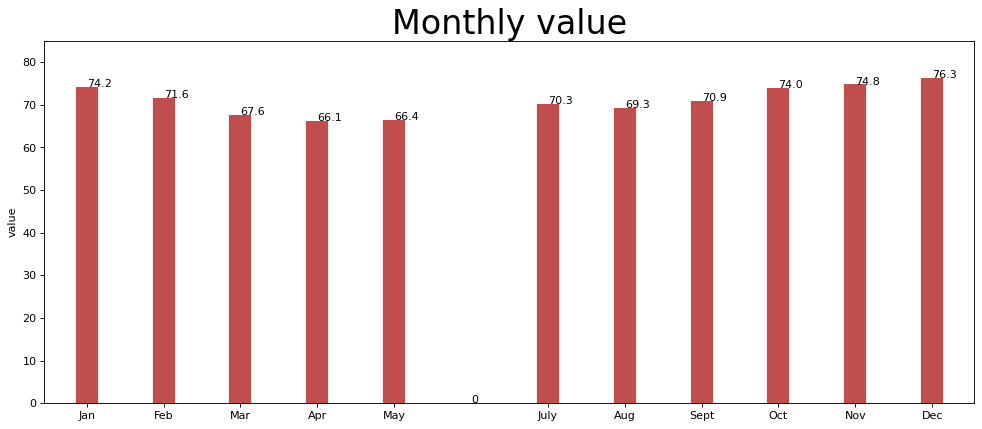

In [26]:
df = final_df[['value', 'month']].groupby('month').apply(lambda x: x.mean())

fig, ax = plt.subplots(figsize=(15,6), facecolor='white', dpi= 80)
ax.vlines(x=df.month, ymin=0, ymax=df.value, color='firebrick', alpha=0.8, linewidth=20)

for i, value in enumerate(df.value):
    if i < 5:
        ax.text(i+1, value, round(value, 1))
        
    else:
        ax.text(i+2, value, round(value, 1))
ax.text(6,0,0)
   
ax.set_title('Monthly value', fontdict={'size':30})
ax.set(ylabel='value', ylim=(0, 85))
ax.set_xticks(df.month)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','July','Aug','Sept','Oct','Nov','Dec'])


plt.show()

<AxesSubplot:title={'center':'Value Distribution'}>

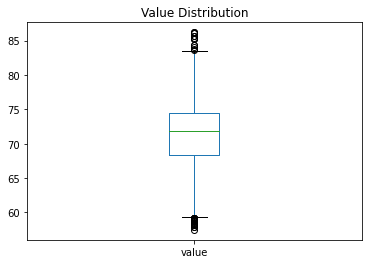

In [8]:
final_df['value'].plot(
        kind='box',
        title='Value Distribution')

<AxesSubplot:title={'center':'Year Distributions of Values'}>

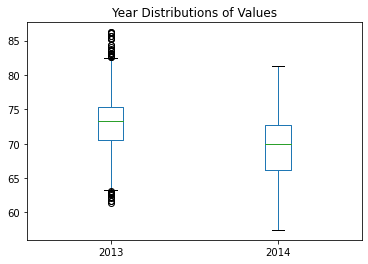

In [9]:
final_df.pivot(columns='year', values='value').plot(
        kind='box',
        title='Year Distributions of Values')

<AxesSubplot:title={'center':'Week Distributions of Values'}>

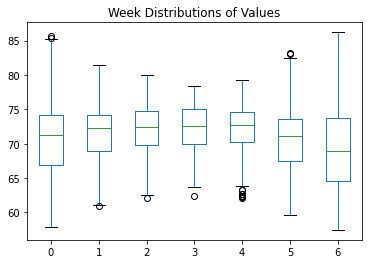

In [10]:
final_df.pivot(columns='dayofweek', values='value').plot(
        kind='box',
        title='Week Distributions of Values')

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

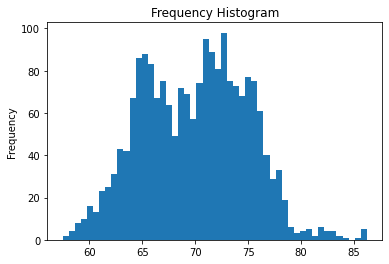

In [13]:
%matplotlib inline

plt.hist(final_df.loc[final_df['isweekend']==True]['value'],bins=50)
plt.gca().set(title="Frequency Histogram", ylabel='Frequency')

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

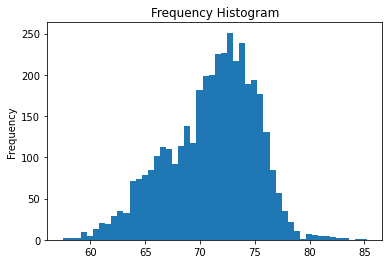

In [14]:
%matplotlib inline

plt.hist(final_df.loc[final_df['daylight']==True]['value'],bins=50)
plt.gca().set(title="Frequency Histogram", ylabel='Frequency')

In [15]:
from sklearn.model_selection import train_test_split
final_df_train,final_df_test = train_test_split(final_df)
final_df_train
final_df_test

,timestamp,value,hour,dayofweek,isweekend,daylight,year,month
4290,2014-01-15 13:00:00,75.480003,13,2,False,1,2014,1
1941,2013-10-06 18:00:00,75.443618,18,6,True,1,2013,10
1802,2013-09-27 00:00:00,77.080864,0,4,False,0,2013,9
5561,2014-03-10 17:00:00,70.258092,17,0,False,1,2014,3
6817,2014-05-09 22:00:00,69.745839,22,4,False,0,2014,5
...,...,...,...,...,...,...,...,...
1290,2013-08-30 01:00:00,70.347713,1,4,False,0,2013,8
6765,2014-05-07 18:00:00,70.245402,18,2,False,1,2014,5
773,2013-08-06 13:00:00,72.447433,13,1,False,1,2013,8
1647,2013-09-20 13:00:00,69.095811,13,4,False,1,2013,9


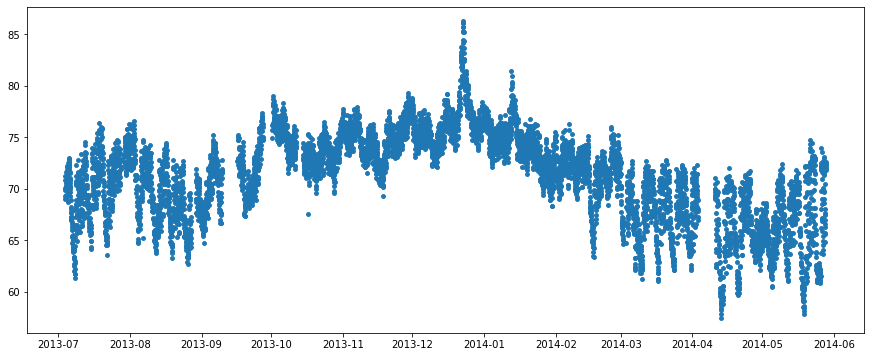

In [27]:
plt.figure(figsize=(15,6))
plt.scatter(pd.to_datetime(final_df['timestamp']), final_df.value, s=15)

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = final_df.loc[:,'value':'month']
km = KMeans(n_clusters=4,max_iter=300)
km.fit(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,
             columns = ['principal component 1', 'principal component 2'])
final_Df = pd.concat([principalDf, final_df[['timestamp']]], axis = 1)
final_Df['class'] = km.labels_
final_Df

,principal component 1,principal component 2,timestamp,class
0,-11.576705,0.547812,2013-07-04 00:00:00,2
1,-10.416141,1.501769,2013-07-04 01:00:00,1
2,-9.467563,1.113437,2013-07-04 02:00:00,2
3,-8.717633,-0.532718,2013-07-04 03:00:00,2
4,-7.685036,-0.389045,2013-07-04 04:00:00,2
...,...,...,...,...
7262,-0.390859,0.055909,2014-05-28 11:00:00,2
7263,0.576017,-0.216558,2014-05-28 12:00:00,0
7264,1.551825,-0.432471,2014-05-28 13:00:00,0
7265,2.515665,-0.724164,2014-05-28 14:00:00,0


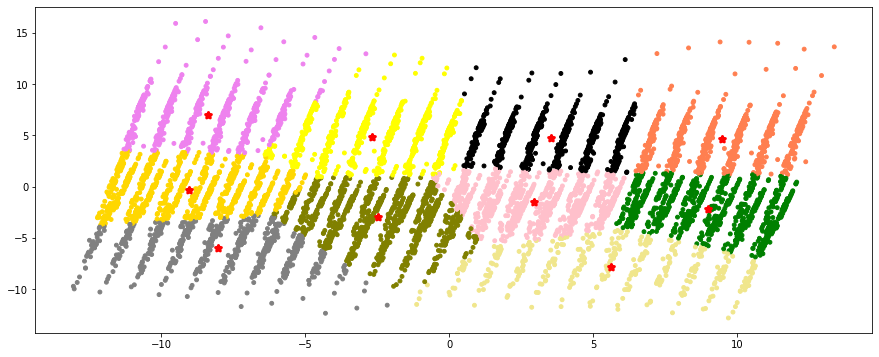

In [19]:
km1 = KMeans(n_clusters=10)
km1.fit(principalComponents)
centroid = km1.cluster_centers_

colormap = np.array(['coral', 'olive','gold','khaki','violet','green','grey','yellow','black','pink'])
plt.figure(figsize=(15,6))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c=colormap[km1.labels_], s=15)
plt.scatter(centroid[:, 0], centroid[:, 1], marker="*", linewidths=3, color="r")

In [20]:
def distEclud(x, y):
    return np.sqrt(sum(np.power(x-y, 2)))
#final_df['distance'] = [distEclud([final_Df.loc[x,'principal component 1'],
#                                   final_Df.loc[x,'principal component 2']], 
#                                   centroid[final_Df.loc[x,'class']]) for x in final_Df.index]


import scipy.spatial.distance as sdist


points = final_Df[['principal component 1','principal component 2']]
#km1 = KMeans(n_clusters=10)
kmeans = KMeans(n_clusters=10, random_state=0).fit(points)
final_Df['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
dists = pd.DataFrame(
    sdist.cdist(points, centroids), 
    columns=['dist_{}'.format(i) for i in range(len(centroids))],
    index=final_Df.index)
dists

,dist_0,dist_1,dist_2,dist_3,dist_4,dist_5,dist_6,dist_7,dist_8,dist_9
0,9.990489,7.489966,20.737054,7.117807,19.154505,2.662428,21.432638,9.628725,14.612811,15.688448
1,8.536205,7.915056,19.740783,5.775628,18.582801,2.304797,20.123976,8.992521,13.646858,14.331815
2,7.858026,7.299293,18.737909,5.893152,17.568567,1.539102,19.254904,7.977498,12.636497,13.504789
3,8.202611,5.551514,17.775592,7.444829,16.114288,0.394519,18.900887,6.572618,11.646632,13.333116
4,7.359546,5.659486,16.761983,7.325631,15.272722,1.394709,17.868978,5.690012,10.633188,12.328972
...,...,...,...,...,...,...,...,...,...,...
7262,5.350568,9.758116,9.630689,10.517710,9.960153,8.699553,10.866765,3.750503,3.649461,6.067143
7263,6.046708,10.375193,8.627236,11.436772,9.179306,9.657017,10.126281,4.209967,2.667801,5.716527
7264,6.780802,11.085499,7.627862,12.342595,8.491158,10.631659,9.396616,4.874139,1.741771,5.472699
7265,7.623788,11.792634,6.623467,13.295367,7.805174,11.600575,8.776233,5.596415,0.908353,5.482206


In [21]:
final_df['mindist']=dists.min(axis=1)

<Figure size 1080x432 with 0 Axes>

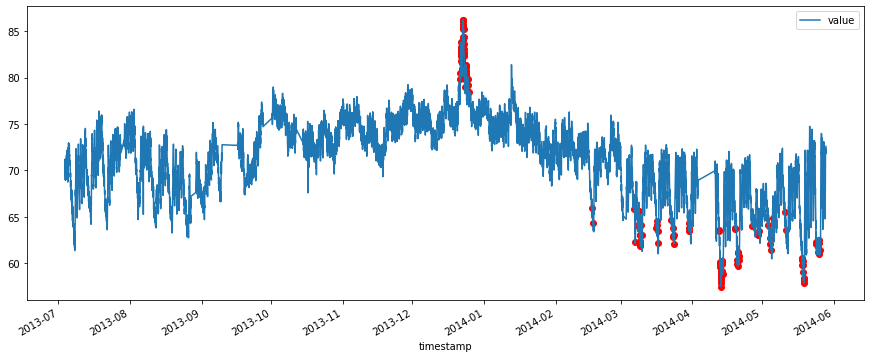

In [22]:
quant = final_df['mindist'].quantile(q=0.98)
final_df.loc[(final_df["mindist"]>=quant),"anomaly"] = -1
final_df.loc[(final_df["mindist"]<quant),"anomaly"] = 1
anomaly_df = final_df[final_df['anomaly']==-1]

final_df['timestamp'] = pd.to_datetime(final_df['timestamp'])
plt.figure(figsize=(15,6))
final_df.plot(x='timestamp', y='value', figsize=(15,6))
plt.scatter(x=anomaly_df.timestamp, y=anomaly_df.value, color='red')

In [23]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.002)
clf.fit(final_df['value'].values.reshape(-1,1))

pred = clf.predict(final_df['value'].values.reshape(-1,1))
final_df['anomaly'] = pred
outliers = final_df.loc[final_df['anomaly']==-1]
outlier_index = list(outliers.index)

In [24]:
#print(outlier_index)
print(final_df['anomaly'].value_counts())

 1    7252
-1      15
Name: anomaly, dtype: int64


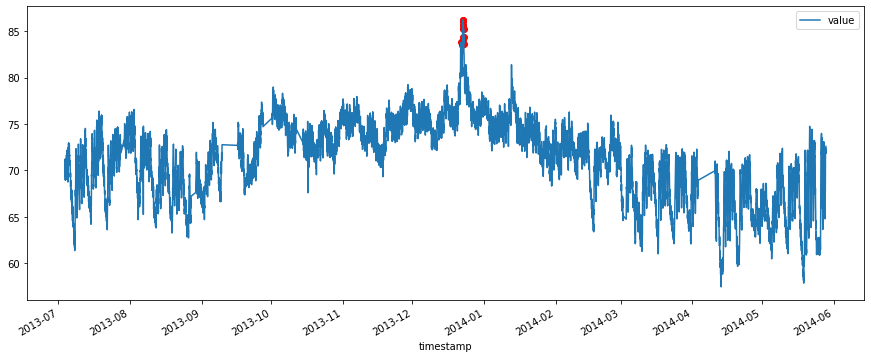

In [25]:
final_df['timestamp'] = pd.to_datetime(final_df['timestamp'])
final_df.plot(x='timestamp', y='value', figsize=(15,6))
plt.scatter(x = outliers.timestamp, y = outliers.value, color='red')